# Import

In [1]:
! ls ../pytn
import sys
sys.path.append("..")

__init__.py   ctmrg_test.py linalg.py     mps.py
__pycache__   dmrg.py       mpo.py        mps_test.py
ctmrg.py      dmrg_test.py  mpo_test.py   utils.py


In [25]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
import pytn
import pytn.dmrg
import pytn.mps
import pytn.mpo

# Calculation

In [4]:
import time
time.time()

1636695652.156615

In [8]:
J = 1.0
g = 0.5
li = []
for num in [6, 7, 8, 9, 10, 11, 12]:
    t0 = time.time()
    mpo = pytn.mpo.traverse_field_ising_mpo(J=J, g=g, num=num)
    m = mpo.as_matrix()
    mps = pytn.mps.up_spin_mps(num=num, chi=None)
    (lam_w, _) = tf.linalg.eigh(m)
    t1 = time.time()
    print(t1-t0)
    el = {
        "method": "direct",
        "min_egival": lam_w[0].numpy(),
        "num": num,
        "chi": None,
        "J": J,
        "g": g,
        "elapsed_time": t1-t0
    }
    li.append(el)
direct_res_li = li

0.02308487892150879
0.011782169342041016
0.014908075332641602
0.0568089485168457
0.30941104888916016
2.800337791442871
24.45807909965515


In [10]:
J = 1.0
g = 0.5
li = []
chi = 10
max_iter = 3
for num in [6, 7, 8, 9, 10, 11, 12, 15, 20, 25, 30]:
    t0 = time.time()
    mpo = pytn.mpo.traverse_field_ising_mpo(J=J, g=g, num=num)
    mps = pytn.mps.up_spin_mps(num=num, chi=chi)
    dmrg = pytn.dmrg.DMRG(mpo=mpo, mps=mps)
    res = dmrg.run(max_iter=max_iter)
    t1 = time.time()
    print(t1-t0)
    el = {
        "method": "DMRG",
        "min_egival": res[-1]["min_eigval"],
        "num": num,
        "chi": chi,
        "J": J,
        "g": g,
        "elapsed_time": t1-t0
    }
    li.append(el)
dmrg_res_li = li

0.08289408683776855
0.10925579071044922
0.1775040626525879
0.2779660224914551
0.413287878036499
0.5402750968933105
0.6910398006439209
1.1697468757629395
1.96952486038208
5.716292142868042
160.05509495735168


In [11]:
J = 1.0
g = 0.5
li = []
chi = 5
max_iter = 3
for num in [6, 7, 8, 9, 10, 11, 12, 15, 20, 25, 30]:
    t0 = time.time()
    mpo = pytn.mpo.traverse_field_ising_mpo(J=J, g=g, num=num)
    mps = pytn.mps.up_spin_mps(num=num, chi=chi)
    dmrg = pytn.dmrg.DMRG(mpo=mpo, mps=mps)
    res = dmrg.run(max_iter=max_iter)
    t1 = time.time()
    print(t1-t0)
    el = {
        "method": "DMRG",
        "min_egival": res[-1]["min_eigval"],
        "num": num,
        "chi": chi,
        "J": J,
        "g": g,
        "elapsed_time": t1-t0
    }
    li.append(el)
dmrg_chi5_res_li = li

0.08193612098693848
0.09221410751342773
0.12948012351989746
0.14004302024841309
0.1784348487854004
0.2029402256011963
0.24538278579711914
0.3801229000091553
0.6764581203460693
2.990142822265625
116.59780502319336


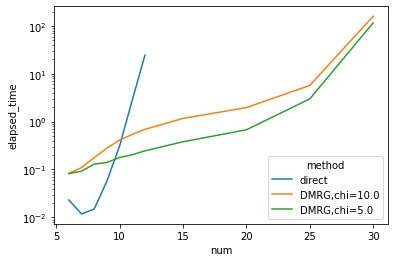

In [26]:
df = pd.DataFrame(direct_res_li + dmrg_res_li + dmrg_chi5_res_li)
df["method"] = np.where(df["method"] == "DMRG", "DMRG,chi="+df["chi"].astype(str), df["method"])
sns.lineplot(data=df, x="num", y="elapsed_time", hue="method")
plt.yscale("log")

直接体格化ではnum=12あたりから計算時間が増大する。
DMRGを使うと、num=25くらいまでは数秒で終わらせることができる。ただし、num=30だと計算時間が大きい。

計算のステップの改善箇所は多数あるので、実装が甘い。

num=30の場合、Hamiltoianの大きさは

In [31]:
2**30

1073741824

になる。

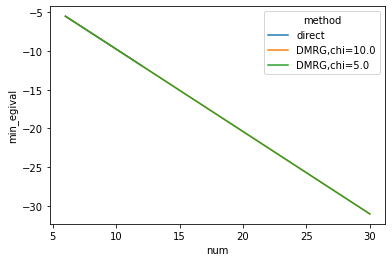

In [30]:
df = pd.DataFrame(direct_res_li + dmrg_res_li + dmrg_chi5_res_li)
df["method"] = np.where(df["method"] == "DMRG", "DMRG,chi="+df["chi"].astype(str), df["method"])
sns.lineplot(data=df, x="num", y="min_egival", hue="method")

固有値はどの計算値もよく一致しているので、DMRGは精度良く固有値を計算できているといえる。

In [32]:
J = 1.0
g = 0.5
li = []
chi = 5
max_iter = 3
num = 20
for chi in [5, 10, 15, 20]:
    t0 = time.time()
    mpo = pytn.mpo.traverse_field_ising_mpo(J=J, g=g, num=num)
    mps = pytn.mps.up_spin_mps(num=num, chi=chi)
    dmrg = pytn.dmrg.DMRG(mpo=mpo, mps=mps)
    res = dmrg.run(max_iter=max_iter)
    t1 = time.time()
    print(t1-t0)
    el = {
        "method": "DMRG",
        "min_egival": res[-1]["min_eigval"],
        "num": num,
        "chi": chi,
        "J": J,
        "g": g,
        "elapsed_time": t1-t0
    }
    li.append(el)
dmrg_chi_res_li = li

0.674293041229248
1.9968976974487305
13.714585781097412
71.17728781700134


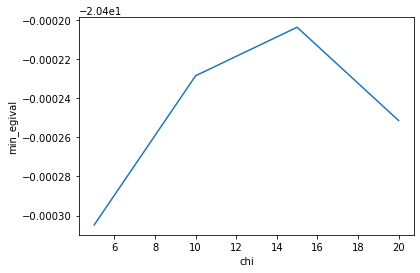

In [36]:
df = pd.DataFrame(dmrg_chi_res_li)
sns.lineplot(data=df, x="chi", y="min_egival")